# **Вступ**

Згідно з цим модулем, ми обговоримо ключову тему даних - EDA (Exploratory Data Analysis). Цей процес допомагає нам розуміти структуру даних, виявляти закономірності та виявляти проблеми. Ми оглянемо основні поняття та інструменти EDA.

Статистика - це основний інструмент для дослідження даних, виявлення зв'язків та отримання характеристик аналітики.

# **Статистика**

**Випадкова величина** - змінна величина в даних, що має випадковий характер.
**Наприклад**, кількість кліків на рекламний банер, витрати на рекламну кампанію, ціна на нерухомість.

**Статистичні показники** включають:
* максимальне та мінімальне значення (max(), min())
* моду (mode())
* медіану (median())
* середнє значення (mean())
* дисперсію (var())
* стандартне відхилення (std())
* коваріацію та кореляцію (cov(), corr())


## **Мода і медіана**

Мода і медіана - ключові статистичні показники, які допомагають узагальнити розподіл випадкової величини.

### **Мода**

**Мода** - це значення, яке ми найчастіше зустрічаємо у
вибірці.

**Наприклад**: розмір взуття студентів, який зустрічається найчастіше в групі, буде модою цього розподілу.

```python
sizes = np.array([38, 43, 39, 40, 41, 42, 41, 39, 41, 42, 43])
mode_value = 41
```

In [37]:
# import numpy, pandas
import numpy as np
import pandas as pd

# створи вектор рандомних чисел від 1 до 12
a = np.random.randint(1, 12, 20)
print(a)

# відсортуй масив
a_sort = np.sort(a)
print(a_sort)

# створи DataFrame і порахуй моду (value_counts, mode)
df = pd.DataFrame(data=a_sort,
                  columns=['values_'],
                  index=np.arange(1, len(a) + 1, 1))
display(df)

display(df.values_.value_counts(normalize=False))
print(f'Mode: {df["values_"].mode()[0]}')


[ 4  4 11  6  6 10  7  4 10  7  5  3  5 11  4  1  5  8  4  4]
[ 1  3  4  4  4  4  4  4  5  5  5  6  6  7  7  8 10 10 11 11]


,values_
1,1
2,3
3,4
4,4
5,4
6,4
7,4
8,4
9,5
10,5


4     6
5     3
6     2
7     2
10    2
11    2
1     1
3     1
8     1
Name: values_, dtype: int64

Mode: 4


### **Медіана**

**Медіана** - це значення, що ділить впорядковані дані на дві половини. Для прикладу, якщо ми відсортуємо розмір взуття студентів, то медіаною буде розмір взуття, який знаходиться в середині цього розподілу.

```python
sizes = np.array([38, 43, 39, 40, 41, 42, 41, 39, 41, 42, 43])
median_value = 41
```

In [203]:
# створи вектор рандомних чисел від 1 до 12
a = np.random.randint(1, 12, 6)
print(a)

# відсортуй масив
a_sort = np.sort(a)
print(a_sort)

# створи DataFrame і порахуй моду (value_counts, mode)
df = pd.DataFrame(data=a_sort,
                  columns=['values_'],
                  index=np.arange(1, len(a) + 1, 1))
print("Median:\n")
display(df["values_"].median())
print(np.median(df.values_))

# порахуй руками
# якщо розмір масиву непарний
if len(a) % 2 == 0:
  left_index = int(len(a) / 2) - 1
  right_index = left_index + 1
  print(f"left index and right index: {a_sort[left_index]}, {a_sort[right_index]}")
  median_value = (a_sort[left_index] + a_sort[right_index]) / 2
  print(f"Median: {median_value}")
else:
  # якщо розмір масиву парний
  index = int(len(a) / 2)
  print(f"Median: {a_sort[index]}")


# знайди медіану за рахунок квантилю
print(np.percentile(a, 50))
print(df.values_.quantile(0.5))



[9 4 2 7 4 5]
[2 4 4 5 7 9]
Median:



4.5

4.5
left index and right index: 4, 5
Median: 4.5
4.5
4.5


## **Математичне очікування**

Математичне очікування, або очікуване значення, є зваженим середнім випадкової величини на основі її розподілу ймовірностей. В основному, воно надає очікуване середнє результату протягом багатьох спроб. Наприклад, в сценарії онлайн-магазину, середня вартість покупки може бути розрахована за допомогою цін продуктів та їх відповідних ймовірностей купівлі.

Математично його можна розрахувати за допомогою наступної формули:

$$E[X] = \mu = \sum_{i=1}^{n} x_{i}p_{i}$$

де $x_{i}$ - значення випадкової величини, а $p_{i}$ - ймовірність цього значення.

Наступний код Python ілюструє, як обчислити очікуване значення для кидка кубика:

```python
import numpy as np

outcomes = np.array([1, 2, 3, 4, 5, 6])
probabilities = np.array([1/6, 1/6, 1/6, 1/6, 1/6, 1/6])

expectation = np.sum(outcomes * probabilities)
print(f"Expectation: {expectation}")

dice_rolls = np.random.choice(outcomes, size=1000000, p=probabilities)
expectation_numpy = np.mean(dice_rolls)
print(f"Expectation with numpy: {expectation_numpy}")
```

У цьому скрипті очікуване значення обчислюється двома різними способами: вручну виконується обчислення та використовується функція numpy mean на великому наборі моделюваних кидків кубика.

In [168]:
# приклад зверху
import numpy as np

outcomes = np.array([1, 2, 3, 4, 5, 6])
probabilities = np.array([1/6, 1/6, 1/6, 1/6, 1/6, 1/6])

expectation = np.sum(outcomes * probabilities)
print(f"Expectation: {expectation}")

dice_rolls = np.random.choice(outcomes, size=1000000, p=probabilities)
print(dice_rolls.shape)

expectation_numpy = np.mean(dice_rolls)
print(f"Expectation with numpy: {expectation_numpy}")

0.5 * 90 + 0.4 * 100 + 0.1 * 95


Expectation: 3.5
(1000000,)
Expectation with numpy: 3.5051


94.5

In [170]:
a = np.arange(20)
probs = np.repeat([1/len(a)], repeats=len(a))
probs


array([0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05,
       0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05])

## **Дисперсія та стандартне відхилення**

**Варіативність та стандартне відхилення** - це міри розсіювання даних, які вказують, наскільки значення відхиляються від середнього.

**Дисперсія** розраховується як середнє значення квадратів відхилень від середнього, тоді як **стандартне відхилення** - це квадратний корінь з дисперсії.

Висока дисперсія або стандартне відхилення вказує на те, що дані розподілені на ширшому діапазоні, тоді як низька дисперсія або стандартне відхилення вказує на те, що дані, як правило, близькі до середнього.

Ось їх формули:

**Дисперсія**:

$$
Var[X] = \sigma^2 = \frac{\sum_{i=1}^{N} (x_{i} - \mu)^2}{N}
$$

**Стандартне відхилення**:

$$
Std[X] = \sigma = \sqrt{Var[X]}
$$
Де:

$x_{i}$ представляє кожне значення з набору даних,
$\mu$ - середнє значення набору даних,
$N$ - загальна кількість значень у наборі даних.
Давайте обчислимо дисперсію та стандартне відхилення вручну та за допомогою numpy для випадкового набору даних:

```python
import numpy as np

# Створимо випадковий набір даних
data = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9])

# Обчислимо середнє значення
mean = np.mean(data)

# Обчислимо дисперсію
variance = np.sum((data - mean) ** 2) / len(data)
print(f"Variance: {variance}")

# Обчислимо стандартне відхилення
std_dev = np.sqrt(variance)
print(f"Standard Deviation: {std_dev}")

# Обчислимо дисперсію за допомогою numpy
variance_numpy = np.var(data)
print(f"Variance with numpy: {variance_numpy}")

# Обчислимо стандартне відхилення за допомогою numpy
std_dev_numpy = np.std(data)
print(f"Standard Deviation with numpy: {std_dev_numpy}")
```

В цьому коді Python ми спочатку обчислюємо середнє значення, дисперсію та стандартне відхилення вручну, а потім використовуємо вбудовані функції numpy для перевірки наших розрахунків.


In [173]:
import numpy as np

# Створимо випадковий набір даних
data = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9])

# Обчислимо середнє значення
mean = np.mean(data)

# Обчислимо дисперсію
variance = np.sum((data - mean) ** 2) / len(data)
print(f"Variance: {variance}")

# Обчислимо стандартне відхилення
std_dev = np.sqrt(variance)
print(f"Standard Deviation: {std_dev}")


Variance: 6.666666666666667
Standard Deviation: 2.581988897471611


In [176]:
# Обчислимо дисперсію за допомогою numpy
print(f"Variance: {data.var()}")

# Обчислимо стандартне відхилення за допомогою numpy
print(f"Standard deviation: {data.std()}")


Variance: 6.666666666666667
Standard deviation: 2.581988897471611


## **Коваріація та кореляція**

**Коваріація** та **кореляція** - це ключові поняття в статистиці та аналізі даних. Вони допомагають оцінити взаємозв'язок між двома випадковими величинами.

**Коваріація** вимірює, наскільки дві випадкові величини варіюються разом. Вона використовується для оцінки лінійного ступеня зміни між двома змінними. Але коваріація не є нормалізованою і тому залежить від одиниць виміру змінних.

**Формула для обчислення коваріації**:

$$
cov(X, Y) = \mathbb{E}[(X - \mathbb{E}[X]) \cdot (Y - \mathbb{E}[Y])]
$$

або спрощено:

$$cov(X, Y) = \frac{1}{N} \sum_{i=1}^{N} (x_i - \mu_x)(y_j - \mu_y)$$

**Кореляція** - це нормалізована міра, яка ділить коваріацію на добуток стандартних відхилень двох змінних.

**Формула для обчислення кореляції**:

$$
\rho_{X, Y} = corr(X, Y) = \frac{cov(X, Y)}{\sigma_X \sigma_Y} = \frac{\mathbb{E}[(X - \mu_X)(Y - \mu_Y)]}{\sigma_X \sigma_Y}
$$

**Кореляція** вимірює ступінь лінійної залежності між двома змінними. Її значення варіюється від -1 (повна негативна кореляція) до +1 (повна позитивна кореляція). Значення 0 означає відсутність кореляції.

**Python код для обчислення коваріації та кореляції:**

```python
import numpy as np

# Генеруємо випадкові дані
x = np.random.rand(100)
y = np.random.rand(100)

# Обчислюємо коваріацію
cov_matrix = np.cov(x, y)
cov_xy = cov_matrix[0, 1]

# Обчислюємо кореляцію
correlation_matrix = np.corrcoef(x, y)
correlation_xy = correlation_matrix[0, 1]

print(f"Коваріація: {cov_xy}")
print(f"Кореляція: {correlation_xy}")
```

У цьому Python коді ми спочатку генеруємо два набори випадкових даних. Потім за допомогою функції numpy.cov обчислюємо коваріацію, а функцією numpy.corrcoef - кореляцію.

In [38]:
# Генеруємо випадкові дані
hours = np.array([2, 4, 5, 6, 10, 3, 4, 10, 20, 4])
grades = np.array([80, 90, 90, 90, 95, 62, 60, 90, 95, 100])

print(hours.shape, grades.shape)


(10,) (10,)


In [81]:
# Обчислюємо коваріацію
cov_matrix = np.cov(hours, grades)
print(cov_matrix)

cov_ = cov_matrix[0,1]
print(cov_)


[[ 28.84444444  32.48888889]
 [ 32.48888889 189.28888889]]
32.48888888888889


In [188]:
# Обчислюємо кореляцію
corr_matrix = np.corrcoef(hours, grades)
print(corr_matrix)

corr_ = corr_matrix
print(corr_)


[[1.         0.43968455]
 [0.43968455 1.        ]]
[[1.         0.43968455]
 [0.43968455 1.        ]]


In [82]:
df = pd.DataFrame({"x": hours, "y": grades})
df

,x,y
0,2,80
1,4,90
2,5,90
3,6,90
4,10,95
5,3,62
6,4,60
7,10,90
8,20,95
9,4,100


In [85]:

cov = np.sum((hours - np.mean(hours)) * (grades - np.mean(grades))) / len(hours)
print(cov)
corr = cov / (hours.std() * grades.std())
corr


29.24


0.4396845532724195

## **Додаткові характеристики**

### **Діапазон (Range)**

**Діапазон** - це простий статистичний показник, який вимірює розмах між найбільшим і найменшим значеннями в наборі даних. Цей показник вказує на ширину варіації між значеннями і допомагає оцінити, наскільки далеко можуть розташовуватись окремі спостереження від центральних значень.

**Формула:**

$$Діапазон=Максимальне \ значення−Мінімальне \ значення$$

**Приклад використання Python**:

```python
# Приклад даних
data = [12, 8, 15, 10, 20, 6, 11]

# Обчислення діапазону
range_value = max(data) - min(data)
print(f"Діапазон: {range_value}")
```

Цей показник дозволяє отримати загальне уявлення про розподіл значень в наборі даних і може бути корисним на початковому етапі аналізу. Однак він не надає повного уявлення про розмах і розподіл даних, тому його рекомендується використовувати разом з іншими статистичними показниками.

In [ ]:
# wage = f(experience, confidence)
# y ~ f(confidence)
# wage = f(experience, y)


In [186]:
# Приклад даних
data = [12, 8, 15, 10, 20, 6, 11]

# Обчислення діапазону
range_value = max(data) - min(data)
print(f"Діапазон: {range_value}")

Діапазон: 14


### **Міжквартильний розмах (IQR)**

**Міжквартильний розмах (IQR)** є статистичним показником, який вимірює розмах між першим квартилем (Q1) та третім квартилем (Q3) в наборі даних. Він є мірою варіації значень в середньому розташованих даних і допомагає виявити наявність викидів або зміщень в розподілі даних.

**Формула:**

$$IQR=Q3−Q1$$

**Приклад використання Python:**

```python
# Приклад даних
data = [12, 8, 15, 10, 20, 6, 11]

# Обчислення міжквартильного розмаху
q1 = np.percentile(data, 25)
q3 = np.percentile(data, 75)
iqr = q3 - q1
print(f"Міжквартильний розмах (IQR): {iqr}")

```

Міжквартильний розмах є більш стійким до викидів у порівнянні з діапазоном, оскільки він базується на значеннях, які розташовані в середній частині набору даних. Він дозволяє зрозуміти розподіл даних та виявити потенційні викиди, що можуть впливати на аналіз інших статистичних показників.

In [202]:
# Приклад даних
data =np.arange(0, 13, 1)

# Обчислення міжквартильного розмаху
q1 = np.percentile(data, 25)
q3 = np.percentile(data, 75)
print(q1, q3)
iqr = q3 - q1
print(f"Міжквартильний розмах (IQR): {iqr}")

3.0 9.0
Міжквартильний розмах (IQR): 6.0


### **Квартилі**

У статистиці, **квартиль** - це значення, яке ділить впорядкований набір даних на чотири рівні, що описують розподіл цих даних. Квартилі дозволяють отримати інформацію про центральні та варіаційні характеристики даних.

**Існує три основних квартилі:**

* **Перший квартиль (Q1)** - значення, що ділить набір даних на нижню четверть.
* **Другий квартиль (Q2)** - також відомий як медіана, є значенням, що ділить набір даних на дві рівні половини.
* **Третій квартиль (Q3)** - значення, що ділить набір даних на верхню четверть.

**Приклад використання Python:**

```python
# Приклад даних
data = [12, 8, 15, 10, 20, 6, 11]

# Обчислення квартилів
q1 = np.percentile(data, 25)
q2 = np.percentile(data, 50)
q3 = np.percentile(data, 75)

print(f"Перший квартиль (Q1): {q1}")
print(f"Другий квартиль (Q2): {q2}")
print(f"Третій квартиль (Q3): {q3}")
```

**Квартилі** є важливими мірками розподілу даних, оскільки вони надають інформацію про центральні та варіаційні характеристики. Вони дозволяють зрозуміти розподіл даних та виявити наявність викидів або нестандартних значень.

In [198]:
# Приклад даних
data = np.arange(0, 101, 1)

# Обчислення квартилів
q1 = np.percentile(data, 25)
q2 = np.percentile(data, 50)
q3 = np.percentile(data, 75)

print(f"Перший квартиль (Q1): {q1}")
print(f"Другий квартиль (Q2): {q2}")
print(f"Третій квартиль (Q3): {q3}")

Перший квартиль (Q1): 25.0
Другий квартиль (Q2): 50.0
Третій квартиль (Q3): 75.0


### **Викиди**

У статистиці, **викиди** - це значення, яке суттєво відрізняється від інших значень в наборі даних. Вони можуть бути результатом помилки вимірювання або вказувати на виняткові або несподівані події. Виявлення викидів є важливою частиною аналізу даних, оскільки вони можуть вплинути на точність статистичних висновків.

Існує кілька підходів до виявлення викидів. Один з них - це використання межі викидів на основі міжквартильного розмаху (IQR). IQR вимірює міру розсіювання даних в міжквартильному діапазоні.

**Формула для обчислення верхньої та нижньої межі викидів:**

* **Верхня межа викидів:** $Upper = Q3 + 1.5 \times IQR$
* **Нижня межа викидів:** $Lower = Q1 - 1.5 \times IQR$

**Приклад використання Python:**

```python
# Приклад даних
data = [12, 8, 15, 10, 20, 6, 11, 30, 40, 5]

# Обчислення квартилів
q1 = np.percentile(data, 25)
q3 = np.percentile(data, 75)
iqr = q3 - q1

# Обчислення меж викидів
upper = q3 + 1.5 * iqr
lower = q1 - 1.5 * iqr

# Виявлення викидів
outliers = [x for x in data if x > upper or x < lower]

print(f"Викиди: {outliers}")
```


In [212]:
# Приклад даних
data = [12, 8, 15, 10, 20, 6, 11, 30, 40, 5]

# Обчислення квартилів
q1 = np.percentile(data, 25)
q3 = np.percentile(data, 75)
iqr = q3 - q1

# Обчислення меж викидів
upper = q3 + 1.5 * iqr
lower = q1 - 1.5 * iqr

# Виявлення викидів
outliers = [x for x in data if x > upper or x < lower]

print(f"Викиди: {outliers}")

Викиди: [40]


### **Z-оцінка (Z-Score)**

**Z-оцінка**, також відома як Z-оцінка **або стандартизоване значення**, використовується для вимірювання того, наскільки віддалене значення від середнього значення в наборі даних. Вона виражає відстань між спостереженням і середнім значенням в одиницях стандартного відхилення.

**Формула для обчислення Z-оцінки:**

$$Z = \frac{X - \mu}{\sigma}$$

де:

* Z - Z-оцінка
* X - значення випадкової величини
* $\mu$ - середнє значення випадкової величини
* $\sigma$ - стандартне відхилення

**Приклад використання Python:**

```python
import numpy as np

# Приклад даних
data = [12, 8, 15, 10, 20, 6, 11, 30, 40, 5]

# Обчислення середнього значення і стандартного відхилення
mean = np.mean(data)
std = np.std(data)

# Обчислення Z-оцінки для кожного значення
z_scores = [(x - mean) / std for x in data]

print(f"Z-оцінки: {z_scores}")
```

З використанням Z-оцінок, ми можемо порівнювати значення різних наборів даних і виявляти значення, що відрізняються від очікуваного.

In [230]:
# Приклад даних
data = np.arange(0, 101, 1)

# Обчислення середнього значення і стандартного відхилення
mean = np.mean(data)
std = np.std(data)
print(mean, std)

# Обчислення Z-оцінки для кожного значення
z_scores = np.array([(x - mean) / std for x in data])

print(f"Z-оцінки: {z_scores}")
mean_ = np.round(np.mean(z_scores), 1)
std_ = np.round(np.std(z_scores), 1)
print(mean_, std_)

# np.log(data)

norm_min_max = (data - min(data)) / (max(data) - min(data))
print(np.min(norm_min_max), np.max(norm_min_max))


50.0 29.154759474226502
Z-оцінки: [-1.71498585 -1.68068613 -1.64638642 -1.6120867  -1.57778698 -1.54348727
 -1.50918755 -1.47488783 -1.44058812 -1.4062884  -1.37198868 -1.33768896
 -1.30338925 -1.26908953 -1.23478981 -1.2004901  -1.16619038 -1.13189066
 -1.09759094 -1.06329123 -1.02899151 -0.99469179 -0.96039208 -0.92609236
 -0.89179264 -0.85749293 -0.82319321 -0.78889349 -0.75459377 -0.72029406
 -0.68599434 -0.65169462 -0.61739491 -0.58309519 -0.54879547 -0.51449576
 -0.48019604 -0.44589632 -0.4115966  -0.37729689 -0.34299717 -0.30869745
 -0.27439774 -0.24009802 -0.2057983  -0.17149859 -0.13719887 -0.10289915
 -0.06859943 -0.03429972  0.          0.03429972  0.06859943  0.10289915
  0.13719887  0.17149859  0.2057983   0.24009802  0.27439774  0.30869745
  0.34299717  0.37729689  0.4115966   0.44589632  0.48019604  0.51449576
  0.54879547  0.58309519  0.61739491  0.65169462  0.68599434  0.72029406
  0.75459377  0.78889349  0.82319321  0.85749293  0.89179264  0.92609236
  0.96039208  0.9

In [231]:
# [z_score * std + mean for z_score in z_scores]
# type(z_scores)
original_data = z_scores * std + mean
print(original_data)

[  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.
  14.  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.
  28.  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.
  42.  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.
  56.  57.  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.
  70.  71.  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.  83.
  84.  85.  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.  97.
  98.  99. 100.]


### **Асиметрія (Skewness)**

**Асиметрія** використовується для вимірювання ступеня, в якому розподіл випадкової величини відхиляється від симетричного розподілу. Вона вказує на нахил розподілу вправо або вліво.

**Формула для обчислення асиметрії:**


$$\text{Асиметрія} = \frac{1}{N} \frac{ \sum_{i=1}^{N} (X_i - \bar{X})^3}{\sigma^3}$$

де:

- Асиметрія - асиметрія
- $X_i$ - значення випадкової величини
- $\bar{X}$ - середнє значення випадкової величини
- $N$ - кількість спостережень

Приклад використання Python:

```python
import numpy as np
from scipy.stats import skew

# Приклад даних
data = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

# Обчислення асиметрії
skewness = skew(data)

print(f"Асиметрія: {skewness}")
```

У цьому прикладі ми використовуємо функцію `skew` з модуля `scipy.stats` для обчислення асиметрії набору даних. Результат надає вимірювання асиметрії розподілу даних.

In [217]:
import numpy as np
from scipy.stats import skew

# Приклад даних
data = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

# Обчислення асиметрії
skewness = skew(data)

print(f"Асиметрія: {skewness}")

Асиметрія: 0.0


### **Куртозис (Kurtosis)**

**Куртозис** використовується для вимірювання ступеня, в якому розподіл випадкової величини відрізняється від розподілу нормального розподілу. Він вказує на "пік" або "плоский" характер розподілу.

**Формула для обчислення куртозису:**

$$\text{Куртозис} = \frac{1}{N} \frac{\sum_{i=1}^{N} (X_i - \bar{X})^4}{ \sigma^4}$$

де:

- $\text{Куртозис}$ - значення куртозису
- $X_i$ - значення випадкової величини
- $\bar{X}$ - середнє значення випадкової величини
- $N$ - кількість спостережень
- $\sigma$ - стандартне відхилення випадкової величини

**Приклад використання в Python:**

```python
import numpy as np
from scipy.stats import kurtosis

# Приклад даних
data = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

# Обчислення куртозису
kurt = kurtosis(data)

print(f"Куртозис: {kurt}")
```

Куртозис дозволяє оцінити ступінь відхилення розподілу від нормального розподілу. З використанням куртозису, ми можемо порівнювати форму розподілу різних наборів даних та виявляти відхилення від нормальності.

In [218]:
import numpy as np
from scipy.stats import kurtosis

# Приклад даних
data = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

# Обчислення куртозису
kurt = kurtosis(data)

print(f"Куртозис: {kurt}")

Куртозис: -1.2242424242424244


# **Pandas**

**Pandas** - бібліотека Python для роботи з даними.
Вона має дві основні структури: **Series** і **DataFrame**.

* **Series** - це одновимірна структура,
* **DataFrame** - двовимірна таблиця.

Використовуючи Pandas, можна легко опрацьовувати, аналізувати та індексувати дані різних типів.

## **Series**

In [239]:
# імпортуй пандас бібліотеку
import pandas as pd

# створи pd.Series приклад
a = pd.Series([1,2,3,4])
display(a)


0    1
1    2
2    3
3    4
dtype: int64

In [240]:
# створи pd.Series приклад з index, name, dtype
b = pd.Series([1,2,3,4], dtype=float, name="table1", index=["label1", "label2", "label3", "label4"])
display(b)



label1    1.0
label2    2.0
label3    3.0
label4    4.0
Name: table1, dtype: float64

In [241]:
# дістань перший елемент по значенню для двох таблиць зверху
print(a[0])
print(b["label1"])


1
1.0


In [243]:
# дістань декілька елементів таблиці за допомогою назви рядків
print(a[0:2])
print(b[["label1", "label2"]])


0    1
1    2
dtype: int64
label1    1.0
label2    2.0
Name: table1, dtype: float64


In [246]:
# створи pd.Series приклад з index, name, dtype
c = pd.Series([1,2,3,4], dtype=float, name="table1", index=["label1", "label2", "label3", "label4"])

# дістань 1-3 елементи, та також за назвою через :
c["label2":"label4"]


label2    2.0
label3    3.0
label4    4.0
Name: table1, dtype: float64

In [247]:
# дістань елементи за назвою атрибута
print(c.label1)
print(c.label2)

1.0
2.0


In [248]:
# відфільтруй таблицу за значеннями (створи маску)
print(a>2)
print(a[a>2])


0    False
1    False
2     True
3     True
dtype: bool
2    3
3    4
dtype: int64


In [249]:
# перевірь, що назва рядка є в індексу
print("label1" in c)


True


In [255]:
# відсортуй по індексу
c = np.random.randint(1,10, 10)
df = pd.Series(c).value_counts()
df_ =df.sort_index()
print(df_)


1    1
2    1
3    1
5    3
6    1
7    1
8    1
9    1
dtype: int64


In [259]:
# відсортуй по значеннями і використай inplace
df_.sort_values(inplace=True, ascending=False)
print(df_)

5    3
1    1
2    1
3    1
6    1
7    1
8    1
9    1
dtype: int64


In [269]:
# створи таблицю з NaN
c = pd.Series([1,2,np.nan,4], dtype=float, name="table1", index=["label1", "label2", "label3", "label4"])
display(c)

# заповни NaN з inplace
c.fillna(np.mean(c), inplace=True)
display(c)


label1    1.0
label2    2.0
label3    NaN
label4    4.0
Name: table1, dtype: float64

label1    1.000000
label2    2.000000
label3    2.333333
label4    4.000000
Name: table1, dtype: float64

## **DataFrame**

In [272]:
# створи таблицю через pd.DataFrame
c = pd.DataFrame([1,2,np.nan,4], dtype=float, columns=["x1"],
                 index=["label1", "label2", "label3", "label4"])
display(c)


,x1
label1,1.0
label2,2.0
label3,NaN
label4,4.0


Для роботи з елементами DataFrame розглянемо підходи, що найчастіше використовуються, які представлені у таблиці нижче.

| Операція                    | Синтаксис      | Результат, що повертається |
| --------------------------- | -------------- | ------------------------- |
| Вибір стовпця                | `df[col]`      | Series                    |
| Вибір рядка за міткою        | `df.loc[label]`| Series                    |
| Вибір рядка за індексом      | `df.iloc[loc]` | Series                    |
| Зріз за рядками              | `df[0:3]`      | DataFrame                 |
| Вибір рядків за умовою       | `df[bool_vec]` | DataFrame                 |


In [273]:
# відобрази 1 з стовпців через його назву
c['x1']



label1    1.0
label2    2.0
label3    NaN
label4    4.0
Name: x1, dtype: float64

In [276]:
# відобрази 1 рядок через індекс
c.loc["label1"]


x1    1.0
Name: label1, dtype: float64

In [278]:
# відобрази 1 рядок через індекс (iloc)
c.iloc[0,0]

1.0

In [279]:
# відобрази декілька рядків
c.iloc[1:3]


,x1
label2,2.0
label3,NaN


In [280]:
# відфільтруй таблицу за допомогою маски (рядок з bool)
c["bool_mask"] = [True, True, False, True]
display(c)
c[c['bool_mask']]


,x1,bool_mask
label1,1.0,True
label2,2.0,True
label3,NaN,False
label4,4.0,True


,x1,bool_mask
label1,1.0,True
label2,2.0,True
label4,4.0,True


### **Читання та запис об'єктів Series та DataFrame**

#### **Робота з даними у форматі CSV**


Ми часто працюємо з форматом CSV (Comma-Separated Values) - одним із найпопулярніших форматів для табличних даних. Для читання CSV файлів в об'єкт DataFrame використовується метод `read_csv()` з основними аргументами:

- `filepath_or_buffer` - шлях до файлу;
- `sep` - роздільник стовпців;
- `header` - номери рядків, що використовуються як імена стовпців;
- `names` - імена стовпців;
- `nrows` - кількість зчитуваних рядків;
- `comment` - символ, що позначає пропущені рядки;
- `skip_blank_lines` - пропуск порожніх рядків;
- `delim_whitespace` - використання пробілів як роздільників стовпців.


In [290]:
import sys
if sys.version_info[0] < 3:
    from StringIO import StringIO
else:
    from io import StringIO

string = """
name,email,phone,favorite
Allen Raymond,nulla.an,te@vestibul.co.uk,(992) 914-3792,False
Chaim Lewis,dui.in@egetlacus.ca,(294) 840-6685,False
Kennedy Lane,mattis.Cras@nonenimMauris.net,(542) 451-7038,True
Wylie Pope,est@utquamvel.net,(692) 802-2949,False
Cyrus Jackson,nibh@semsempererat.com,(501) 472-5218,True
"""
csvStringIO = StringIO(string)
df = pd.read_csv(csvStringIO, sep=",")
df.to_csv("./users.csv", index=False)


In [287]:
# зчитай user.csv
df = pd.read_csv("./users.csv", sep=',')
display(df.head(3))

display(df.tail(3))




,name,email,phone,favorite
0,Allen Raymond,nulla.ante@vestibul.co.uk,(992) 914-3792,False
1,Chaim Lewis,dui.in@egetlacus.ca,(294) 840-6685,False
2,Kennedy Lane,mattis.Cras@nonenimMauris.net,(542) 451-7038,True


,name,email,phone,favorite
2,Kennedy Lane,mattis.Cras@nonenimMauris.net,(542) 451-7038,True
3,Wylie Pope,est@utquamvel.net,(692) 802-2949,False
4,Cyrus Jackson,nibh@semsempererat.com,(501) 472-5218,True


Для запису даних у файл CSV використовуйте метод to_csv об'єкта DataFrame з наступними параметрами:

- **path_or_buf**: шлях або буфер для збереження файлу
- **sep**: символ-роздільник полів (за замовчуванням кома ",")
- **na_rep**: рядок для заміни відсутніх даних (за замовчуванням порожній рядок)
- **columns**: послідовність, що ідентифікує виведені стовпці
- **header**: виводити імена стовпців (за замовчуванням True). Можна встановити значення False або список імен стовпців
- **index**: зберігати індекси (за замовчуванням True)

In [288]:
# запиши .csv файл data.csv
df.to_csv("./data.csv", index=False)



#### **Робота з файлами .xlsx**

Бібліотека pandas здатна зчитувати файли Excel з розширеннями .xls та .xlsx у DataFrame за допомогою методу pd.read_excel. Примітка: для роботи з файлами .xlsx може знадобитись додатковий пакет openpyxl.

In [294]:
str_ = """     name
  Michael
     John
     Liza
"""
import sys
if sys.version_info[0] < 3:
    from StringIO import StringIO
else:
    from io import StringIO

csvStringIO = StringIO(str_)
pd.read_csv(csvStringIO, sep=",").to_excel("./persons.xlsx", index=False)



In [295]:
# зчитай persons.xlsx
df = pd.read_excel("./persons.xlsx")
display(df)


,name
0,Michael
1,John
2,Liza


In [296]:
# запиши contatcs.xlsx, sheet name = "Contacts"
df.to_excel('./contacts.xlsx', sheet_name="Contacts")


#### **Робота з файлами JSON**

Для зчитування даних у форматі JSON використовується метод read_json. Основні параметри методу:

- **path_or_buf**: шлях до файлу, URL або JSON-рядок.
- **orient**: орієнтація даних, за замовчуванням None.
- **type**: тип структури pandas, за замовчуванням 'frame'.

Параметр orient вказує на вигляд JSON, який може бути перетворений на структуру даних pandas. Можливі значення orient та відповідні JSON-структури:


`split` - структура

```python
{
  "columns": ["name", "country"],
  "index": [1, 2, 3],
  "data": [
    ["Michael", "Canada"],
    ["John", "USA"],
    ["Liza", "Australia"]
  ]
}
```

In [301]:
df = (pd.DataFrame([["Michael", "Canada"], ["John", "USA"], ["Liza", "Australia"]],
                         columns=["name", "country"],
                         index=[1,2,3])
# .reset_index(drop=True)
# .sort_values(by=["country"])
# .drop_duplicates()
)
# df = df.reset_index()
# df= df.sort_values(by="country")

df.to_json("employees.json", orient="split")



In [302]:
# зчитай json файл з структурою split
employees = pd.read_json("./employees.json", orient="split")


`records` структура
```python
[
  {
    "name": "Michael",
    "country": "Canada"
  },
  {
    "name": "John",
    "country": "USA"
  },
  {
    "name": "Liza",
    "country": "Australia"
  }
]
```


In [303]:
records = [
  {
    "name": "Michael",
    "country": "Canada"
  },
  {
    "name": "John",
    "country": "USA"
  },
  {
    "name": "Liza",
    "country": "Australia"
  }
]
(pd.DataFrame
 .from_dict(records)
 .to_json("./records.json", orient="records")
)

In [305]:
# зчитай json файл з структурою records
employees = pd.read_json("./records.json", orient="records")
display(employees)


,name,country
0,Michael,Canada
1,John,USA
2,Liza,Australia


`index` структура
```python
{
  "1": {
    "name": "Michael",
    "country": "Canada"
  },
  "2": {
    "name": "John",
    "country": "USA"
  },
  "3": {
    "name": "Liza",
    "country": "Australia"
  }
}
```

In [306]:
index = {
  "1": {
    "name": "Michael",
    "country": "Canada"
  },
  "2": {
    "name": "John",
    "country": "USA"
  },
  "3": {
    "name": "Liza",
    "country": "Australia"
  }
}

pd.DataFrame.from_dict(index, orient="index").to_json("./index.json", orient="index")

In [308]:
# зчитай json файл з структурою index
employees = pd.read_json("./index.json", orient="index")
display(employees)


,name,country
1,Michael,Canada
2,John,USA
3,Liza,Australia


`columns` структура
```python
{
  "name": { "1": "Michael", "2": "John", "3": "Liza" },
  "country": { "1": "Canada", "2": "USA", "3": "Australia" }
}
```

In [310]:
columns = {
  "name": { "1": "Michael", "2": "John", "3": "Liza" },
  "country": { "1": "Canada", "2": "USA", "3": "Australia" }
}
(pd.DataFrame
 .from_dict(columns, orient="columns")
 .to_json("./columns.json", orient="columns")
)

In [312]:
# зчитай json файл з структурою columns
employees = pd.read_json("./columns.json", orient="columns")
employees


,name,country
1,Michael,Canada
2,John,USA
3,Liza,Australia


## **Збір даних**

Бібліотека pandas надає метод `read_html` для парсингу даних з HTML-таблиць. Основні параметри методу:

- **io**: URL або файловий об'єкт, з якого зчитується HTML-код.
- **match**: рядок для пошуку в таблиці, за допомогою якого обробляються тільки відповідні таблиці.
- **header**: індексний рядок, що використовується для заголовків стовпців.
- **attrs**: словник атрибутів HTML для визначення потрібної таблиці.
- **thousands**: символ-роздільник для груп розрядів у великих числах.
- **decimal**: символ для позначення десяткової крапки.

Метод `read_html` дозволяє ефективно виконувати парсинг HTML-таблиць і отримувати необхідні дані.

In [88]:
url = "https://statisticstimes.com/tech/top-computer-languages.php"
# зчитай таблицю з сайту за допомогою read_html, attrs = id:table_id
df = pd.read_html(url, attrs={"id": "table_id"})
df = df[0]
display(df)


,Jun 2022,Jun 2021,Change,Programming language,Ratings,Change.1
0,1,2,↑,Python,12.20%,+0.35%
1,2,1,↓,C,11.91%,-0.64%
2,3,3,NaN,Java,10.47%,-1.07%
3,4,4,NaN,C++,9.63%,+2.26%
4,5,5,NaN,C#,6.12%,+1.79%
5,6,6,NaN,Visual Basic,5.42%,+1.40%
6,7,7,NaN,JavaScript,2.09%,-0.24%
7,8,10,↑,SQL,1.94%,+0.06%
8,9,9,NaN,Assembly language,1.85%,-0.21%
9,10,16,↑↑,Swift,1.55%,+0.44%


## **Робота з даними. Очищення та обстеження даних**

### **Додавання**

In [91]:
# створи pd.Series і додай елемент створивши новий індекс
df = pd.Series([1,2,3])
display(df)

df[5] = 10
df


0    1
1    2
2    3
dtype: int64

0     1
1     2
2     3
5    10
dtype: int64

In [94]:
# створи pd.DataFrame і додай cтовпець
df = pd.DataFrame([1,2,3], columns=["x1"])
display(df)

df["x_sqrt"] = np.sqrt(df.x1)
df


,x1
0,1
1,2
2,3


,x1,x_sqrt
0,1,1.000000
1,2,1.414214
2,3,1.732051


In [103]:
# створи pd.Series і додай рядок за допомогою append
df = pd.DataFrame([1,2,3], columns=["x1"])
display(df)

df2 = pd.DataFrame([4], columns=["x1"])
display(df2)

df_ = df.append(df2).reset_index(drop=True)
display(df_)


,x1
0,1
1,2
2,3


,x1
0,4


<ipython-input-103-5945db990a5e>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ = df.append(df2).reset_index(drop=True)


,x1
0,1
1,2
2,3
3,4


### **Видалення**

In [118]:
# створи pd.DataFrame і видали рядки за допомогою drop
import numpy as np
df = pd.DataFrame([1,4, 2,3, np.nan], columns=["x1"])
# df = df[~df.x1.isin([4,2])]
df = df.drop([1,2])
display(df)


,x1
0,1.0
3,3.0
4,NaN


In [112]:
df = df[(df.x1!=4)].reset_index(drop=True)
df

,x1
0,1.0
1,3.0
2,NaN


In [132]:
# створи pd.DataFrame і видали стовпці за допомогою drop
df = pd.DataFrame({"x1": ["st1","st2","st3"], "x2": ["surname1", "surname2", "surname3"]})

def func(x):
  result = " + ".join(x[["x1", "x2"]])
  return result

df['x3'] = df.apply(lambda x: ' + '.join(x), axis=1)
display(df)

def func(x):
  result = " + ".join(x[["x1", "x2"]])
  return result

df["x4"] = df.apply(lambda x: func(x), axis=1)

df = (df
      .drop(labels=["x1", "x2", "x4"], axis=1)
      .rename(columns={'x3': 'full_name'})
      )

display(df)


,x1,x2,x3
0,st1,surname1,st1 + surname1
1,st2,surname2,st2 + surname2
2,st3,surname3,st3 + surname3


,full_name
0,st1 + surname1
1,st2 + surname2
2,st3 + surname3


### **Об'єднання**

In [141]:
# створи 2 таблиці і об'єднай за допомогою concat, axis=0
a = pd.DataFrame([1,2,3], columns=["x1"])
b = pd.DataFrame([1,2,3,4], columns=["x2"])

display(a)
display(b)

c = pd.concat([a, b], axis=1)
c


,x1
0,1
1,2
2,3


,x2
0,1
1,2
2,3
3,4


,x1,x2
0,1.0,1
1,2.0,2
2,3.0,3
3,NaN,4


In [140]:
# створи 2 таблиці і об'єднай за допомогою concat, axis=1
a = pd.DataFrame([1,2,3], columns=["x1"])
b = pd.DataFrame([1,2,3], columns=["x1"])

c = pd.concat([a, b], axis=0).reset_index(drop=True)
c


,x1
0,1
1,2
2,3
3,1
4,2
5,3


### **Очищення**

Для об'єднання структур pandas застосовується метод `concat`. Основні параметри методу:

- **objs**: структура Series або DataFrame, які необхідно об'єднати.
- **axis**: вказує напрямок об'єднання - 0 для об'єднання по рядках, 1 для об'єднання по стовпцях.
- **join**: визначає тип об'єднання - 'outer' для логічного АБО, 'inner' для логічного І.
- **ignore_index**: логічний параметр, встановлений на False за замовчуванням. Якщо встановлено на True, індекси не використовуються під час об'єднання.

Метод `concat` дозволяє ефективно об'єднувати структури pandas вздовж рядків або стовпців залежно від значення параметра axis.

In [155]:
# створи таблицю з NaN і використай dropna
a = pd.DataFrame([1,2,3, np.nan, 4, np.nan], columns=["x1"])
a["x2"] = 1
a["x3"] = a.x1
display(a)

c = pd.concat([a.loc[:, "x1":"x2"].dropna(axis=1).reset_index(drop=True), a.x3], axis=1)
c


,x1,x2,x3
0,1.0,1,1.0
1,2.0,1,2.0
2,3.0,1,3.0
3,NaN,1,NaN
4,4.0,1,4.0
5,NaN,1,NaN


,x2,x3
0,1,1.0
1,1,2.0
2,1,3.0
3,1,NaN
4,1,4.0
5,1,NaN


In [164]:
# створи таблицю з NaN і використай fillna (з ключами)
a = pd.DataFrame([1,2,3, np.nan, 4, np.nan], columns=["x1"])
display(a)

mean_ = a.x1.mean()
c = a.fillna({"x1": mean_})
display(c)

a.x1 = a.x1.fillna(np.mean(a.x1))
display(a)


,x1
0,1.0
1,2.0
2,3.0
3,NaN
4,4.0
5,NaN


,x1
0,1.0
1,2.0
2,3.0
3,2.5
4,4.0
5,2.5


,x1
0,1.0
1,2.0
2,3.0
3,2.5
4,4.0
5,2.5


In [166]:
# створи таблицю з дуплікатами і використай drop_duplicates
a = pd.DataFrame([1,2,3, np.nan, 3, np.nan], columns=["x1"])
display(a)

a.drop_duplicates()



,x1
0,1.0
1,2.0
2,3.0
3,NaN
4,3.0
5,NaN


,x1
0,1.0
1,2.0
2,3.0
3,NaN


## **Часові ряди**

Аналіз часових рядів є важливим напрямом у роботі з даними. Бібліотека pandas надає потужний інструментарій для роботи з часовими рядами.

Основні класи для роботи з часовими рядами в pandas:

- `Timestamp`: представляє одиничну часову мітку. Його можна створити за допомогою конструктора `Timestamp` або методу `to_datetime`.
- `DatetimeIndex`: представляє набір об'єктів `Timestamp` та надає потужні функції для роботи з ними. Можна створити `DatetimeIndex` за допомогою методу `to_datetime`, `date_range`, `bdate_range` або конструктора `DatetimeIndex`.
- `Period`: представляє одиничний часовий інтервал.
- `PeriodIndex`: представляє набір об'єктів `Period`.

У pandas використовуються часові мітки та часові інтервали. Часова мітка є конкретним значенням дати та часу, тоді як часовий інтервал має неповну часову мітку та маркер, що визначає період.

Створення часової мітки можна здійснити за допомогою конструктора `Timestamp` або методу `to_datetime`.

Примітка: Функціонал створення часових міток та часових інтервалів в pandas є дуже розширеним і виходить за межі цього конспекту.

In [167]:
# створи pd.Timestamp (yyyy-mm-dd)
date = pd.Timestamp("2021-09-10")

print(type(date))

print(date)


<class 'pandas._libs.tslibs.timestamps.Timestamp'>
2021-09-10 00:00:00


In [168]:
# створи datetime (yyyy-MM-DD hh:mm:ss)
date = pd.to_datetime("2021-09-10 2:54:13")

print(type(date))
print(date)

<class 'pandas._libs.tslibs.timestamps.Timestamp'>
2021-09-10 02:54:13


In [175]:
# створи date_range (start, freq, periods)
date = pd.date_range(start='2021-09-01', end='2021-09-08', freq='D')

# створи таблицю з date_range та значеннями
temperature = pd.DataFrame([23, 17, 17, 16, 15, 14, 17, 20], index=date, columns=["avg_temperature"])

display(temperature)


,avg_temperature
2021-09-01,23
2021-09-02,17
2021-09-03,17
2021-09-04,16
2021-09-05,15
2021-09-06,14
2021-09-07,17
2021-09-08,20


### Часові інтервали

Параметр `freq` використовується для визначення кроку діапазону в pandas. Він може мати різні значення для визначення різних часових інтервалів. Ось деякі значення, які можна використовувати для параметру `freq`:

- `D`: день
- `W`: тиждень
- `M`: місяць
- `Q`: квартал
- `Y`: рік
- `H`: година
- `T` або `min`: хвилина
- `S`: секунда

Ці значення вказують, який період часу використовується для створення часових інтервалів. Наприклад, якщо використовується значення `M` (місяць), то будуть створені часові інтервали місяцями.

Примітка: Це лише деякі зі значень, які можна використовувати для параметру `freq`. Бібліотека pandas надає багато інших можливостей для визначення часових інтервалів.

## **Візуалізація даних**

У бібліотеці pandas для візуалізації даних існує метод `plot`, який можна викликати на об'єктах Series або DataFrame. При виклику методу `plot` без параметрів буде побудовано лінійний графік. Однак, за допомогою аргументу `kind` можна змінювати форму графічного представлення даних. Ось деякі значення параметру `kind` і їх опис:

- `bar` (або `barh`): побудова стовпчикової діаграми
- `hist`: побудова гістограми
- `box`: коробчаста діаграма
- `kde`: побудова графіка щільності
- `area`: діаграма зі сферами
- `scatter`: точковий графік
- `hexbin`: візуалізація даних за допомогою шестикутників
- `pie`: кругова діаграма

Використовуючи ці значення для параметру `kind`, можна створювати різноманітні типи графіків для візуалізації даних у pandas.

,avg_temperature
2021-09-01,23
2021-09-02,17
2021-09-03,17
2021-09-04,16
2021-09-05,15
2021-09-06,14
2021-09-07,17
2021-09-08,20


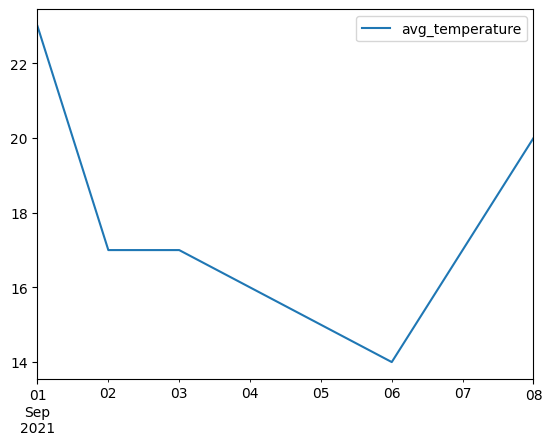

In [179]:
import matplotlib.pyplot as plt

# створи date_range (start, freq, periods)
date = pd.date_range(start='2021-09-01', end='2021-09-08', freq='D')

# створи таблицю з date_range та значеннями
temperature = pd.DataFrame([23, 17, 17, 16, 15, 14, 17, 20], index=date, columns=["avg_temperature"])

display(temperature)

# відобрази за допомогою pandas
temperature.plot()
plt.show()


In [181]:
import seaborn as sns

iris = sns.load_dataset('iris')
display(iris.head())
print(iris.shape)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


(150, 5)


In [183]:
import pandas as pd
iris["bins"] = pd.cut(iris.sepal_length, labels=np.arange(10), bins=10)
display(iris)

,sepal_length,sepal_width,petal_length,petal_width,species,bins
0,5.1,3.5,1.4,0.2,setosa,2
1,4.9,3.0,1.4,0.2,setosa,1
2,4.7,3.2,1.3,0.2,setosa,1
3,4.6,3.1,1.5,0.2,setosa,0
4,5.0,3.6,1.4,0.2,setosa,1
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,6
146,6.3,2.5,5.0,1.9,virginica,5
147,6.5,3.0,5.2,2.0,virginica,6
148,6.2,3.4,5.4,2.3,virginica,5


<Axes: title={'center': 'sepal_length'}>

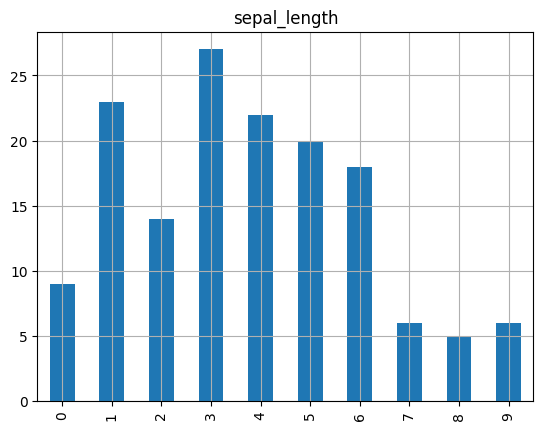

In [191]:
(iris
 .bins
 .value_counts()
 .sort_index()
 .plot(kind='bar', grid=True, title="sepal_length")
)

<Axes: ylabel='Frequency'>

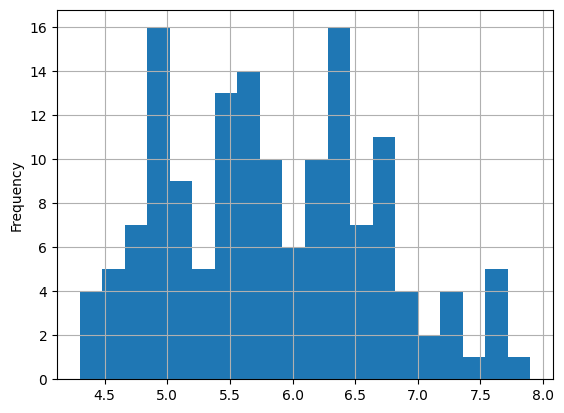

In [194]:
iris.sepal_length.plot.hist(grid=True, bins=20)

In [198]:

df = sns.load_dataset("mpg")
df.name="mpg"
display(df.head(5))
display(df.info())

cross_tab = pd.crosstab(df.origin, df.cylinders)
display(cross_tab)


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,mpg
1,15.0,8,350.0,165.0,3693,11.5,70,usa,mpg
2,18.0,8,318.0,150.0,3436,11.0,70,usa,mpg
3,16.0,8,304.0,150.0,3433,12.0,70,usa,mpg
4,17.0,8,302.0,140.0,3449,10.5,70,usa,mpg


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


None

cylinders,3,4,5,6,8
origin,,,,,
europe,0,63,3,4,0
japan,4,69,0,6,0
usa,0,72,0,74,103


# **Додатковий важливий матеріал**

In [228]:
df = pd.DataFrame({"x1":["student1", "student1", "student2", "student2"], "x2": [1,np.nan,3,4], "x3": [1.2,2.3,3.4,2.3]})
display(df)

,x1,x2,x3
0,student1,1.0,1.2
1,student1,NaN,2.3
2,student2,3.0,3.4
3,student2,4.0,2.3


In [202]:
# shape
df.shape

(4, 3)

In [203]:
# columns
np.array(df.columns)

array(['x1', 'x2', 'x3'], dtype=object)

In [204]:
# info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      4 non-null      object 
 1   x2      3 non-null      float64
 2   x3      4 non-null      float64
dtypes: float64(2), object(1)
memory usage: 224.0+ bytes


In [205]:
# describe
df.describe()

,x2,x3
count,3.000000,4.000000
mean,2.666667,2.300000
std,1.527525,0.898146
min,1.000000,1.200000
25%,2.000000,2.025000
50%,3.000000,2.300000
75%,3.500000,2.575000
max,4.000000,3.400000


In [210]:
# groupby
display(df)
display(df.groupby('x1').size())
display(df.groupby('x1').agg({"x2": np.mean, "x3": np.sum}))


def func(x):
  data = np.mean(x)
  return data

display(df.groupby('x1').apply(lambda x: func(x)))


,x1,x2,x3
0,student1,1.0,1.2
1,student1,NaN,2.3
2,student2,3.0,3.4
3,student2,4.0,2.3


x1
student1    2
student2    2
dtype: int64

,x2,x3
x1,,
student1,1.0,3.5
student2,3.5,5.7


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3472: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mea

,x2,x3
x1,,
student1,1.0,1.75
student2,3.5,2.85


In [215]:
df2 = pd.DataFrame({"x1": ["student1", "student3"], "x4":[1,2]})
display(df2)

df_ = pd.merge(df, df2, how="outer", left_on=["x1"], right_on=["x1"])
display(df_)


,x1,x4
0,student1,1
1,student3,2


,x1,x2,x3,x4
0,student1,1.0,1.2,1.0
1,student1,NaN,2.3,1.0
2,student2,3.0,3.4,NaN
3,student2,4.0,2.3,NaN
4,student3,NaN,NaN,2.0


In [222]:
display(df_.isnull())
display(df_.x1.isnull())
display(df_.isnull().sum(axis=0))


,x1,x2,x3,x4
0,False,False,False,False
1,False,True,False,False
2,False,False,False,True
3,False,False,False,True
4,False,True,True,False


0    False
1    False
2    False
3    False
4    False
Name: x1, dtype: bool

x1    0
x2    2
x3    1
x4    2
dtype: int64

In [234]:
df = df.rename(columns={"x1": "x_new"})
display(df)

,x_new,x2,x3
0,student1,1.0,1.2
1,student1,NaN,2.3
2,student2,3.0,3.4
3,student2,4.0,2.3


In [237]:
df = df.set_index(["x_new", "x2"])
display(df)

x3
x_new    x2      
student1 1.0  1.2
         NaN  2.3
student2 3.0  3.4
         4.0  2.3

In [238]:
df.reset_index()

,x_new,x2,x3
0,student1,1.0,1.2
1,student1,NaN,2.3
2,student2,3.0,3.4
3,student2,4.0,2.3


In [239]:
df.sort_values(by=["x_new", "x2"], ascending=[False, True])

x3
x_new    x2      
student2 3.0  3.4
         4.0  2.3
student1 1.0  1.2
         NaN  2.3

In [99]:
df_dupl = pd.concat([df, df], axis=0)
display(df_dupl)
# df_dupl["x3"] = np.arange(df_dupl.shape[0])

df_dupl.duplicated()

,x2,x3
x_new,,
student1,1.0,1.2
student1,NaN,2.3
student2,3.0,3.4
student2,4.0,2.3
student1,1.0,1.2
student1,NaN,2.3
student2,3.0,3.4
student2,4.0,2.3


x_new
student1    False
student1    False
student2    False
student2    False
student1     True
student1     True
student2     True
student2     True
dtype: bool

In [107]:
display(df_dupl)

display(df_dupl.x3.unique())
display(df_dupl.apply(lambda x: x.unique(), axis=0))
display(df_dupl.apply(lambda x: x.nunique(), axis=0))



,x2,x3
x_new,,
student1,1.0,1.2
student1,NaN,2.3
student2,3.0,3.4
student2,4.0,2.3
student1,1.0,1.2
student1,NaN,2.3
student2,3.0,3.4
student2,4.0,2.3


array([1.2, 2.3, 3.4])

x2    [1.0, nan, 3.0, 4.0]
x3         [1.2, 2.3, 3.4]
dtype: object

x2    3
x3    3
dtype: int64

In [123]:

df_bins = pd.DataFrame(pd.cut(np.arange(1, 101), bins=10, right=True), columns=["bins"])

display(df_bins)


,bins
0,"(0.901, 10.9]"
1,"(0.901, 10.9]"
2,"(0.901, 10.9]"
3,"(0.901, 10.9]"
4,"(0.901, 10.9]"
...,...
95,"(90.1, 100.0]"
96,"(90.1, 100.0]"
97,"(90.1, 100.0]"
98,"(90.1, 100.0]"


In [124]:
display(df_bins.bins.value_counts())

(0.901, 10.9]    10
(10.9, 20.8]     10
(20.8, 30.7]     10
(30.7, 40.6]     10
(40.6, 50.5]     10
(50.5, 60.4]     10
(60.4, 70.3]     10
(70.3, 80.2]     10
(80.2, 90.1]     10
(90.1, 100.0]    10
Name: bins, dtype: int64

In [127]:
display(df)
display(df.sum())
display(df.mean())
display(df.max())
display(df.min())
display(df.var())
display(df.count())

,x2,x3
x_new,,
student1,1.0,1.2
student1,NaN,2.3
student2,3.0,3.4
student2,4.0,2.3


x2    8.0
x3    9.2
dtype: float64

x2    2.666667
x3    2.300000
dtype: float64

x2    4.0
x3    3.4
dtype: float64

x2    1.0
x3    1.2
dtype: float64

x2    2.333333
x3    0.806667
dtype: float64

x2    3
x3    4
dtype: int64

In [131]:
display(df)
df.reset_index().x_new.replace({"student1": "st1", "student2": "st2"})


,x2,x3
x_new,,
student1,1.0,1.2
student1,NaN,2.3
student2,3.0,3.4
student2,4.0,2.3


0    st1
1    st1
2    st2
3    st2
Name: x_new, dtype: object


Here is a list of the first 100 functions in pandas, ordered by their importance and commonly used functionality:

1. `pd.pivot_table`: Create a pivot table from a DataFrame.
2. `pd.melt`: Unpivot a DataFrame from wide to long format.
3. `pd.idxmin`: Find the index of the minimum value in each column.
4. `pd.idxmax`: Find the index of the maximum value in each column.
5. `pd.cumsum`: Compute the cumulative sum of values in each column.
6. `pd.cumprod`: Compute the cumulative product of values in each column.
7. `pd.diff`: Compute the first discrete difference of values in each column.
8. `pd.shift`: Shift the index by a specified number of periods.
9. `pd.isin`: Check whether values in a DataFrame are contained in a list of values.
10. `pd.notnull`: Check if values in a DataFrame are not missing or null.
11. `pd.any`: Check if any value in each column is True.
12. `pd.all`: Check if all values in each column are True.
13. `pd.dtypes`: Get the data types of each column in a DataFrame.
14. `pd.to_datetime`: Convert a column to datetime format.
15. `pd.to_numeric`: Convert a column to numeric format.
16. `pd.to_string`: Convert a DataFrame to a string representation.
17. `pd.to_clipboard`: Copy a DataFrame to the clipboard.
18. `pd.factorize`: Encode values in a column as categorical integers.
19. `pd.get_dummies`: Convert categorical variables into dummy/indicator variables.
20. `pd.DataFrame.iterrows`: Iterate over rows of a DataFrame as (index, Series) pairs.
21. `pd.DataFrame.rolling`: Provide rolling window calculations over a DataFrame.
22. `pd.DataFrame.expanding`: Provide expanding window calculations over a DataFrame.
23. `pd.DataFrame.corr`: Compute pairwise correlation of columns, excluding NA/null values.
24. `pd.DataFrame.cov`: Compute pairwise covariance of columns, excluding NA/null values.
25. `pd.DataFrame.resample`: Resample time-series data.
26. `pd.DataFrame.query`: Query the columns of a DataFrame with a boolean expression.
27. `pd.DataFrame.sample`: Return a random sample of items from a DataFrame.
28. `pd.DataFrame.at`: Access a single value for a row/column label pair.
29. `pd.DataFrame.iat`: Access a single value for a row/column pair by integer position.
30. pd.unstack
